## Introduction

This notebook demonstrates the use of Formal Concept Analysis (FCA) techniques using the `fca-algorithms` library.

### 1. Cancer dataset


In [1]:
import pandas as pd

df = pd.read_csv("../data/cancer_prepared.csv")

In [2]:
df.head()

,Age_bin_1,Age_bin_2,Age_bin_3,Genetic_Risk_bin_1,Genetic_Risk_bin_2,Genetic_Risk_bin_3,Air_Pollution_bin_1,Air_Pollution_bin_2,Air_Pollution_bin_3,Alcohol_Use_bin_1,...,Cancer_Type=Leukemia,Cancer_Type=Liver,Cancer_Type=Lung,Cancer_Type=Prostate,Cancer_Type=Skin,Cancer_Stage=Stage 0,Cancer_Stage=Stage I,Cancer_Stage=Stage II,Cancer_Stage=Stage III,Cancer_Stage=Stage IV
0,False,False,True,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,True,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,True,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False


### Import Custom FCA Utility Functions

We import a set of helper functions from the `src.utils` module, which contains core logic for concept extraction, rule mining, visualization, and evaluation used throughout this notebook.


In [3]:
from src.utils import get_and_show_concepts, get_rules_for_rounds, print_top_rules_by_support, \
    evaluate_itemset_across_rounds, get_and_show_rules, analyze_rule_evolution, evaluate_random_rules

### Extract and Display Formal Concepts


This function allows filtering based on:
- **min_support** – to include only concepts that appear frequently enough in the data.
- **min_len_of_concept** – to exclude trivial concepts with too few attributes.
- **use_mapping** – to toggle between displaying raw feature names or decoded labels for readability.

In [4]:
get_and_show_concepts(df.head(2000), min_support=0.15, min_len_of_concept=2, use_mapping=False)

1: ['Smoking_bin_1', 'Target_Severity_Score_bin_1'] - Support: 0.188
2: ['Genetic_Risk_bin_1', 'Target_Severity_Score_bin_1'] - Support: 0.185
3: ['Air_Pollution_bin_1', 'Target_Severity_Score_bin_1'] - Support: 0.1845
4: ['Genetic_Risk_bin_3', 'Target_Severity_Score_bin_3'] - Support: 0.1825
5: ['Smoking_bin_3', 'Target_Severity_Score_bin_3'] - Support: 0.18
6: ['Alcohol_Use_bin_1', 'Target_Severity_Score_bin_1'] - Support: 0.1675
7: ['Obesity_Level_bin_1', 'Target_Severity_Score_bin_1'] - Support: 0.1635
8: ['Alcohol_Use_bin_3', 'Target_Severity_Score_bin_3'] - Support: 0.1575
9: ['Air_Pollution_bin_3', 'Target_Severity_Score_bin_3'] - Support: 0.154


### Generate and Display Association Rules

- **min_support** – to include only rules that appear frequently enough across rounds.
- **min_confidence** – to include only rules that consistently hold with full confidence.
- **use_mapping** – to control whether raw or mapped attribute names are displayed.
- **plot** – if enabled, generates a visual graph of the association rules.

In [5]:
get_and_show_rules(df, min_support=0.15, min_confidence=0.3, use_mapping=False, plot=False)

RULE 1:
"Smoking" [bin bin from 1]
  ->
"Target_Severity_Score" [bin bin from 1]

[Support: 0.1859] [Confidence: 0.5525] [Lift: 1.6436]

RULE 2:
"Genetic_Risk" [bin bin from 1]
  ->
"Target_Severity_Score" [bin bin from 1]

[Support: 0.1846] [Confidence: 0.5524] [Lift: 1.6431]

RULE 3:
"Smoking" [bin bin from 3]
  ->
"Target_Severity_Score" [bin bin from 3]

[Support: 0.1840] [Confidence: 0.5530] [Lift: 1.6672]

RULE 4:
"Genetic_Risk" [bin bin from 3]
  ->
"Target_Severity_Score" [bin bin from 3]

[Support: 0.1783] [Confidence: 0.5486] [Lift: 1.6537]

RULE 5:
"Air_Pollution" [bin bin from 1]
  ->
"Target_Severity_Score" [bin bin from 1]

[Support: 0.1689] [Confidence: 0.4929] [Lift: 1.4662]

RULE 6:
"Alcohol_Use" [bin bin from 1]
  ->
"Target_Severity_Score" [bin bin from 1]

[Support: 0.1657] [Confidence: 0.4940] [Lift: 1.4696]

RULE 7:
"Alcohol_Use" [bin bin from 3]
  ->
"Target_Severity_Score" [bin bin from 3]

[Support: 0.1609] [Confidence: 0.4914] [Lift: 1.4814]

RULE 8:
"Air_Poll

### 2. ESS dataset

In [6]:
df = pd.read_csv("../data/essround1.csv")

In [7]:
df.head()

,aesfdrk_1_2,aesfdrk_2_2,clsprty_1_3,clsprty_2_3,clsprty_3_3,freehms_1_3,freehms_2_3,freehms_3_3,gincdif_1_3,gincdif_2_3,...,trstplc_3_3,trstplt_1_3,trstplt_2_3,trstplt_3_3,trstprl_1_3,trstprl_2_3,trstprl_3_3,trstun_1_3,trstun_2_3,trstun_3_3
0,False,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,True,False,True,False
2,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,True
3,False,True,True,False,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,False,True,True,False,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,True,False


In [8]:
get_and_show_concepts(df.head(20), min_support=0.7, min_len_of_concept=2, use_mapping=False)

1: ['clsprty_1_3', 'impcntr_1_3'] - Support: 0.9
2: ['health_1_3', 'impcntr_1_3'] - Support: 0.85
3: ['impcntr_1_3', 'impfree_1_3'] - Support: 0.85
4: ['clsprty_1_3', 'health_1_3', 'impcntr_1_3'] - Support: 0.8
5: ['clsprty_1_3', 'impcntr_1_3', 'impfree_1_3'] - Support: 0.8
6: ['impcntr_1_3', 'stfhlth_3_3'] - Support: 0.8
7: ['clsprty_1_3', 'health_1_3', 'impcntr_1_3', 'iplylfr_1_3'] - Support: 0.75
8: ['clsprty_1_3', 'impcntr_1_3', 'stfhlth_3_3'] - Support: 0.75
9: ['happy_3_3', 'impcntr_1_3'] - Support: 0.75
10: ['health_1_3', 'impcntr_1_3', 'impfree_1_3'] - Support: 0.75
11: ['health_1_3', 'impcntr_1_3', 'stfhlth_3_3'] - Support: 0.75
12: ['impcntr_1_3', 'ipeqopt_1_3'] - Support: 0.75
13: ['clsprty_1_3', 'happy_3_3', 'impcntr_1_3'] - Support: 0.7
14: ['clsprty_1_3', 'health_1_3', 'impcntr_1_3', 'impfree_1_3'] - Support: 0.7
15: ['clsprty_1_3', 'health_1_3', 'impcntr_1_3', 'stfhlth_3_3'] - Support: 0.7
16: ['clsprty_1_3', 'impcntr_1_3', 'ipeqopt_1_3'] - Support: 0.7
17: ['happy_3_3',

In [9]:
get_and_show_rules(df, min_support=0.4, min_confidence=1, use_mapping=False, plot=False)

RULE 1:
"prtdgcl" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.4081] [Confidence: 1.0000] [Lift: 1.0248]



### Analyzing Rules Across Different Rounds

- **min_support** – to include only rules that appear frequently enough across rounds.
- **min_confidence** – to include only rules that consistently hold with full confidence.
- **use_mapping** – to control whether raw or mapped attribute names are displayed.
- **show_repeated** – to filter and display those rules that appear in multiple rounds.

In [10]:
get_rules_for_rounds(min_support=0.7, min_confidence=1, show_repeated=0, use_mapping=False)


================= Round #1 =================

================= Round #2 =================

================= Round #3 =================

================= Round #4 =================

================= Round #5 =================

================= Round #6 =================

================= Round #7 =================

================= Round #8 =================
RULE 1:
"ipeqopt" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.7452] [Confidence: 1.0000] [Lift: 1.0006]


================= Round #9 =================


In [11]:
get_rules_for_rounds(min_support=0.6, min_confidence=1, show_repeated=0, use_mapping=False)


================= Round #1 =================

================= Round #2 =================

================= Round #3 =================
RULE 1:
"freehms" [bin 1 from 3]
"stfhlth" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.6285] [Confidence: 1.0000] [Lift: 1.0067]


================= Round #4 =================

================= Round #5 =================

================= Round #6 =================

================= Round #7 =================

================= Round #8 =================
RULE 1:
"ipeqopt" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.7452] [Confidence: 1.0000] [Lift: 1.0006]

RULE 2:
"iplylfr" [bin 1 from 3]
"ipeqopt" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.6976] [Confidence: 1.0000] [Lift: 1.0006]

RULE 3:
"impcntr" [bin 1 from 3]
"ipeqopt" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.6795] [Confidence: 1.0000] [Lift: 1.0006]

RULE 4:
"ipudrst" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.6767]

In [12]:
get_rules_for_rounds(min_support=0.5, min_confidence=1, show_repeated=2, use_mapping=False)


================= Round #1 =================

================= Round #2 =================

================= Round #3 =================
RULE 1:
"freehms" [bin 1 from 3]
"stfhlth" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.6285] [Confidence: 1.0000] [Lift: 1.0067]

RULE 2:
"iplylfr" [bin 1 from 3]
"freehms" [bin 1 from 3]
"stfhlth" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.5684] [Confidence: 1.0000] [Lift: 1.0067]

RULE 3:
"freehms" [bin 1 from 3]
"stfhlth" [bin 3 from 3]
"happy" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.5567] [Confidence: 1.0000] [Lift: 1.0067]

RULE 4:
"impcntr" [bin 1 from 3]
"freehms" [bin 1 from 3]
"stfhlth" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.5551] [Confidence: 1.0000] [Lift: 1.0067]

RULE 5:
"prtdgcl" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.5350] [Confidence: 1.0000] [Lift: 1.0067]

RULE 6:
"freehms" [bin 1 from 3]
"stfhlth" [bin 3 from 3]
"stflife" [bin 3 from 3]
  ->
"clspr

In [13]:
get_rules_for_rounds(min_support=0.8, min_confidence=0.99, show_repeated=3, use_mapping=False)


================= Round #1 =================

================= Round #2 =================

================= Round #3 =================
RULE 1:
"iplylfr" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.8821] [Confidence: 0.9937] [Lift: 1.0004]

RULE 2:
"impcntr" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.8498] [Confidence: 0.9941] [Lift: 1.0008]

RULE 3:
"happy" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.8426] [Confidence: 0.9934] [Lift: 1.0001]


================= Round #4 =================
RULE 1:
"iplylfr" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.8761] [Confidence: 0.9929] [Lift: 1.0009]

RULE 2:
"impcntr" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.8665] [Confidence: 0.9935] [Lift: 1.0015]

RULE 3:
"freehms" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.8358] [Confidence: 0.9932] [Lift: 1.0012]

RULE 4:
"happy" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.8295] [Confidence: 0.9912] [Li

### Display Rule with Highest Support

This function shows the most frequently occurring rule across all rounds.

- **top_n** – number of top rules to display.
- **use_mapping** – to control whether raw or mapped attribute names are shown.
-

*Note: This operation may take some time to execute depending on the size.*

In [15]:
print_top_rules_by_support(top_n=10, use_mapping=False)  #+- 10 minutes to find


================= Round #1 =================
RULE 1:
"prtdgcl" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.4081] [Confidence: 1.0000] [Lift: 1.0248]

RULE 2:
"impcntr" [bin 1 from 3]
"prtdgcl" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.3612] [Confidence: 1.0000] [Lift: 1.0248]

RULE 3:
"iplylfr" [bin 1 from 3]
"prtdgcl" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.3586] [Confidence: 1.0000] [Lift: 1.0248]

RULE 4:
"prtdgcl" [bin 1 from 3]
"happy" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.3497] [Confidence: 1.0000] [Lift: 1.0248]

RULE 5:
"prtdgcl" [bin 1 from 3]
"ipeqopt" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.3307] [Confidence: 1.0000] [Lift: 1.0248]

RULE 6:
"freehms" [bin 1 from 3]
"prtdgcl" [bin 1 from 3]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.3254] [Confidence: 1.0000] [Lift: 1.0248]

RULE 7:
"prtdgcl" [bin 1 from 3]
"aesfdrk" [bin 2 from 2]
  ->
"clsprty" [bin 1 from 3]

[Support: 0.3228] [Confidenc

### Evaluate Rule Across Rounds

- **base** – the antecedent of the rule.
- **add** – the consequent of the rule.
- **use_mapping** – to control whether raw or mapped attribute names are shown.
- **plot** – visualizes the rule’s **support** and **confidence** across rounds.

"How close to party" [bin 1 from 3]
  ->
"Feel closer to a particular party than all other parties" [bin 1 from 3]

================= Round #1 =================
Support: 0.4081 - Confidence: 1.0000 - Lift: 1.0248

================= Round #2 =================
Support: 0.4882 - Confidence: 1.0000 - Lift: 1.0137

================= Round #3 =================
Support: 0.5350 - Confidence: 1.0000 - Lift: 1.0067

================= Round #4 =================
Support: 0.3716 - Confidence: 1.0000 - Lift: 1.0080

================= Round #5 =================
Support: 0.3920 - Confidence: 1.0000 - Lift: 1.0053

================= Round #6 =================
Support: 0.4125 - Confidence: 1.0000 - Lift: 1.0054

================= Round #7 =================
Support: 0.5065 - Confidence: 1.0000 - Lift: 1.0051

================= Round #8 =================
Support: 0.3777 - Confidence: 1.0000 - Lift: 1.0006

================= Round #9 =================
Support: 0.4692 - Confidence: 1.0000 - Lift: 1.0068


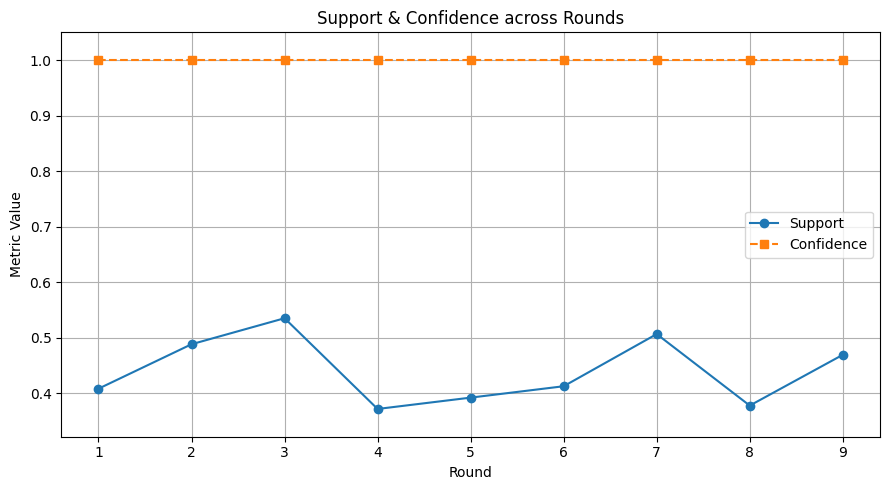

In [16]:
evaluate_itemset_across_rounds(base={"prtdgcl_1_3"}, add={"clsprty_1_3"}, use_mapping=True, plot=True)

"Important that people are treated equally and have equal opportunities" [bin 1 from 3]
  ->
"Feel closer to a particular party than all other parties" [bin 1 from 3]

================= Round #1 =================
Support: 0.7346 - Confidence: 0.9776 - Lift: 1.0018

================= Round #2 =================
Support: 0.7745 - Confidence: 0.9878 - Lift: 1.0013

================= Round #3 =================
Support: 0.7848 - Confidence: 0.9937 - Lift: 1.0003

================= Round #4 =================
Support: 0.7568 - Confidence: 0.9903 - Lift: 0.9983

================= Round #5 =================
Support: 0.7694 - Confidence: 0.9939 - Lift: 0.9992

================= Round #6 =================
Support: 0.7838 - Confidence: 0.9973 - Lift: 1.0026

================= Round #7 =================
Support: 0.7609 - Confidence: 0.9963 - Lift: 1.0014

================= Round #8 =================
Support: 0.7452 - Confidence: 1.0000 - Lift: 1.0006

================= Round #9 =================
Sup

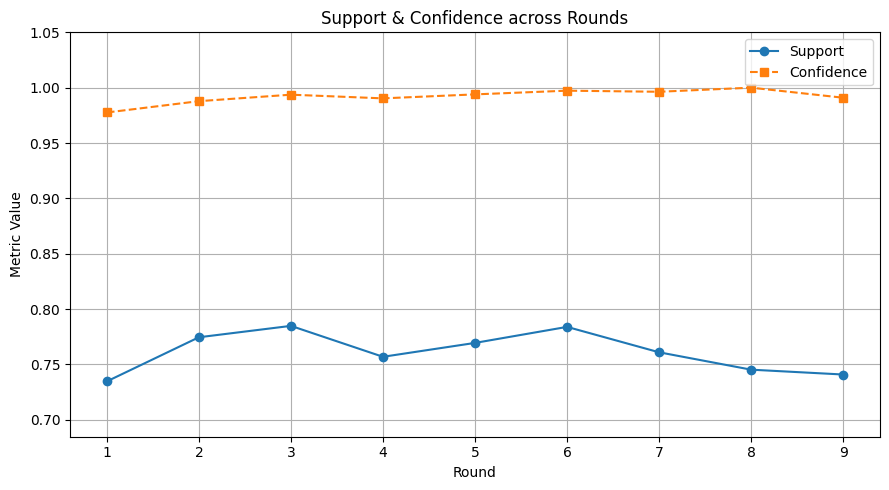

In [17]:
evaluate_itemset_across_rounds(base={"ipeqopt_1_3"}, add={"clsprty_1_3"}, use_mapping=True, plot=True)

"Feel closer to a particular party than all other parties" [bin 1 from 3]
  ->
"Important that people are treated equally and have equal opportunities" [bin 1 from 3]

================= Round #1 =================
Support: 0.7346 - Confidence: 0.7528 - Lift: 1.0018

================= Round #2 =================
Support: 0.7745 - Confidence: 0.7851 - Lift: 1.0013

================= Round #3 =================
Support: 0.7848 - Confidence: 0.7900 - Lift: 1.0003

================= Round #4 =================
Support: 0.7568 - Confidence: 0.7629 - Lift: 0.9983

================= Round #5 =================
Support: 0.7694 - Confidence: 0.7735 - Lift: 0.9992

================= Round #6 =================
Support: 0.7838 - Confidence: 0.7881 - Lift: 1.0026

================= Round #7 =================
Support: 0.7609 - Confidence: 0.7648 - Lift: 1.0014

================= Round #8 =================
Support: 0.7452 - Confidence: 0.7456 - Lift: 1.0006

================= Round #9 =================
Sup

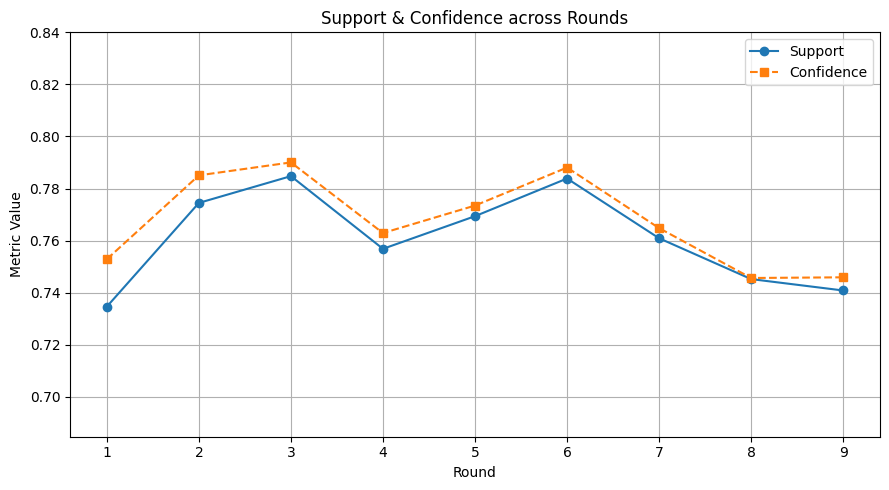

In [18]:
evaluate_itemset_across_rounds(base={"clsprty_1_3"}, add={"ipeqopt_1_3"}, use_mapping=True, plot=True)

"iplylfr" [bin 1 from 3]
"impcntr" [bin 1 from 3]
"happy" [bin 3 from 3]
"ipeqopt" [bin 1 from 3]
"stflife" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

================= Round #1 =================
Support: 0.4286 - Confidence: 0.9855 - Lift: 1.0099

================= Round #2 =================
Support: 0.4370 - Confidence: 0.9911 - Lift: 1.0046

================= Round #3 =================
Support: 0.4828 - Confidence: 0.9954 - Lift: 1.0021

================= Round #4 =================
Support: 0.4722 - Confidence: 0.9916 - Lift: 0.9996

================= Round #5 =================
Support: 0.4748 - Confidence: 0.9926 - Lift: 0.9979

================= Round #6 =================
Support: 0.5035 - Confidence: 0.9979 - Lift: 1.0032

================= Round #7 =================
Support: 0.4737 - Confidence: 0.9952 - Lift: 1.0003

================= Round #8 =================
Support: 0.5062 - Confidence: 1.0000 - Lift: 1.0006

================= Round #9 =================
Support: 0.5116 -

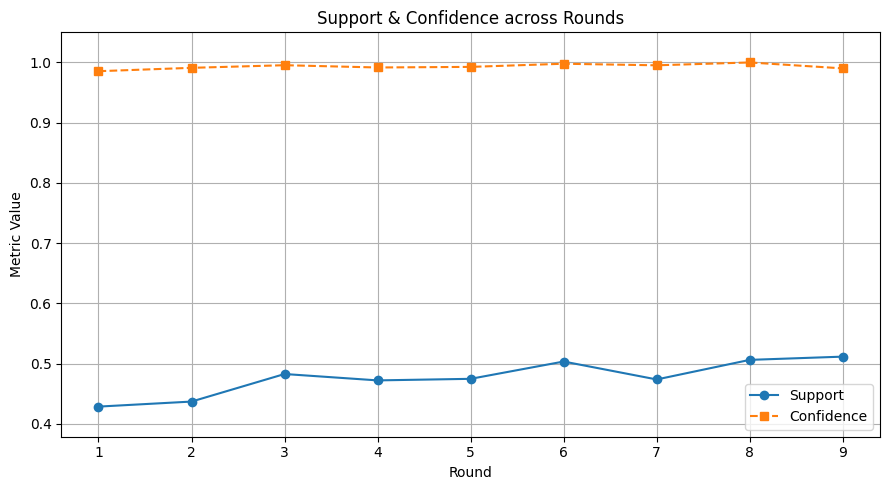

In [19]:
evaluate_itemset_across_rounds(base={"ipeqopt_1_3", "stflife_3_3", "impcntr_1_3", "iplylfr_1_3", "happy_3_3"},
                               add={"clsprty_1_3"},
                               use_mapping=False, plot=True)

"clsprty" [bin 1 from 3]
  ->
"iplylfr" [bin 1 from 3]
"impcntr" [bin 1 from 3]
"happy" [bin 3 from 3]
"ipeqopt" [bin 1 from 3]
"stflife" [bin 3 from 3]

================= Round #1 =================
Support: 0.4286 - Confidence: 0.4393 - Lift: 1.0099

================= Round #2 =================
Support: 0.4370 - Confidence: 0.4430 - Lift: 1.0046

================= Round #3 =================
Support: 0.4828 - Confidence: 0.4860 - Lift: 1.0021

================= Round #4 =================
Support: 0.4722 - Confidence: 0.4759 - Lift: 0.9996

================= Round #5 =================
Support: 0.4748 - Confidence: 0.4773 - Lift: 0.9979

================= Round #6 =================
Support: 0.5035 - Confidence: 0.5062 - Lift: 1.0032

================= Round #7 =================
Support: 0.4737 - Confidence: 0.4761 - Lift: 1.0003

================= Round #8 =================
Support: 0.5062 - Confidence: 0.5065 - Lift: 1.0006

================= Round #9 =================
Support: 0.5116 -

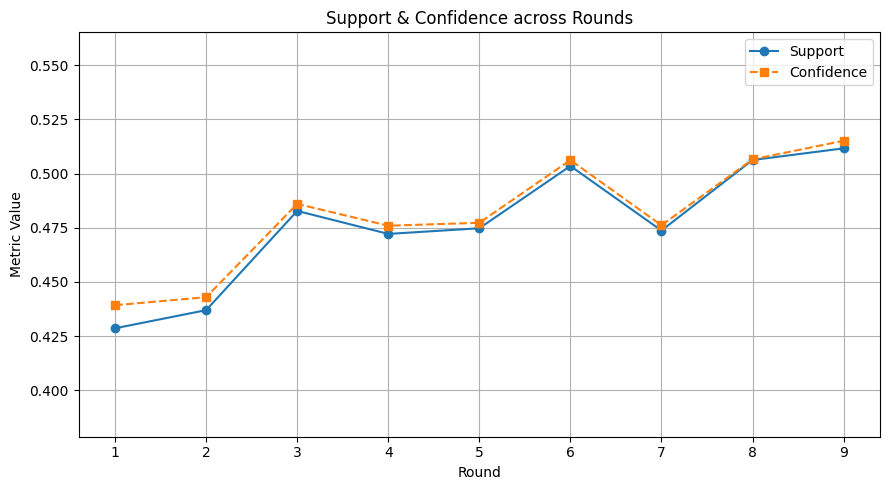

In [20]:
evaluate_itemset_across_rounds(base={"clsprty_1_3"},
                               add={"ipeqopt_1_3", "stflife_3_3", "impcntr_1_3", "iplylfr_1_3", "happy_3_3"},
                               use_mapping=False, plot=True)

"freehms" [bin 1 from 3]
"ipeqopt" [bin 1 from 3]
"stfhlth" [bin 3 from 3]
  ->
"clsprty" [bin 1 from 3]

================= Round #1 =================
Support: 0.3955 - Confidence: 0.9791 - Lift: 1.0034

================= Round #2 =================
Support: 0.4685 - Confidence: 0.9870 - Lift: 1.0005

================= Round #3 =================
Support: 0.5100 - Confidence: 1.0000 - Lift: 1.0067

================= Round #4 =================
Support: 0.5284 - Confidence: 0.9936 - Lift: 1.0016

================= Round #5 =================
Support: 0.5581 - Confidence: 0.9948 - Lift: 1.0001

================= Round #6 =================
Support: 0.5757 - Confidence: 0.9972 - Lift: 1.0026

================= Round #7 =================
Support: 0.5376 - Confidence: 0.9958 - Lift: 1.0009

================= Round #8 =================
Support: 0.5294 - Confidence: 1.0000 - Lift: 1.0006

================= Round #9 =================
Support: 0.4986 - Confidence: 0.9921 - Lift: 0.9989


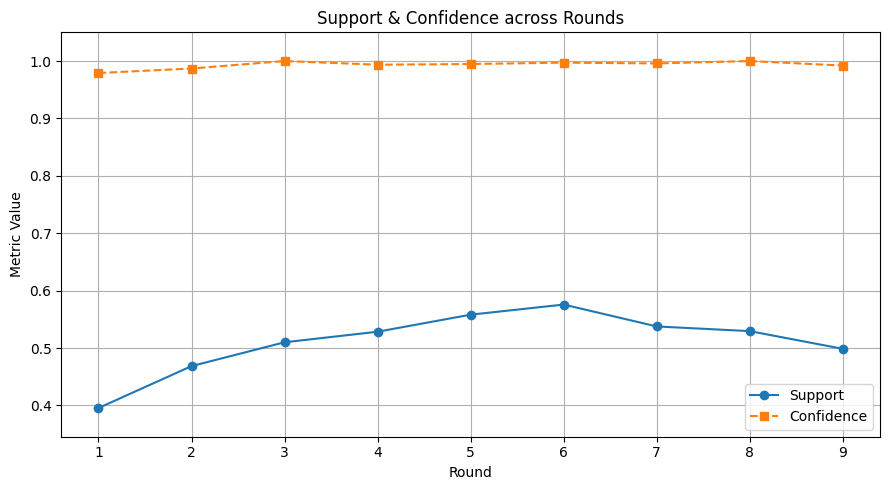

In [21]:
evaluate_itemset_across_rounds(base={"freehms_1_3", "ipeqopt_1_3", "stfhlth_3_3"},
                               add={"clsprty_1_3"}, plot=True)

### Analyze Rule Evolution Within a Single Round

This function selects the top rules from a specified ESS round and analyzes how these rules perform across other rounds.

- **round_name** – specifies which ESS round to analyze.
- **num_of_rules** – number of top rules to track over time.
- **min_support** – to include only rules that appear frequently enough.
- **min_confidence** – to include only rules with full confidence.
- **use_mapping** – to control whether raw or mapped attribute names are shown.
- **plot** – visualizes the changes in **support** and **confidence** across partitions of the selected round.



Analyzing top 10 rules from Round 1 with minimum support 0.35

🔍 Rule #1:
"How close to party" [bin 1 from 3]
  ->
"Feel closer to a particular party than all other parties" [bin 1 from 3]

================= Round #1 =================
Support: 0.4081 - Confidence: 1.0000 - Lift: 1.0248

================= Round #2 =================
Support: 0.4882 - Confidence: 1.0000 - Lift: 1.0137

================= Round #3 =================
Support: 0.5350 - Confidence: 1.0000 - Lift: 1.0067

================= Round #4 =================
Support: 0.3716 - Confidence: 1.0000 - Lift: 1.0080

================= Round #5 =================
Support: 0.3920 - Confidence: 1.0000 - Lift: 1.0053

================= Round #6 =================
Support: 0.4125 - Confidence: 1.0000 - Lift: 1.0054

================= Round #7 =================
Support: 0.5065 - Confidence: 1.0000 - Lift: 1.0051

================= Round #8 =================
Support: 0.3777 - Confidence: 1.0000 - Lift: 1.0006

================= Round #

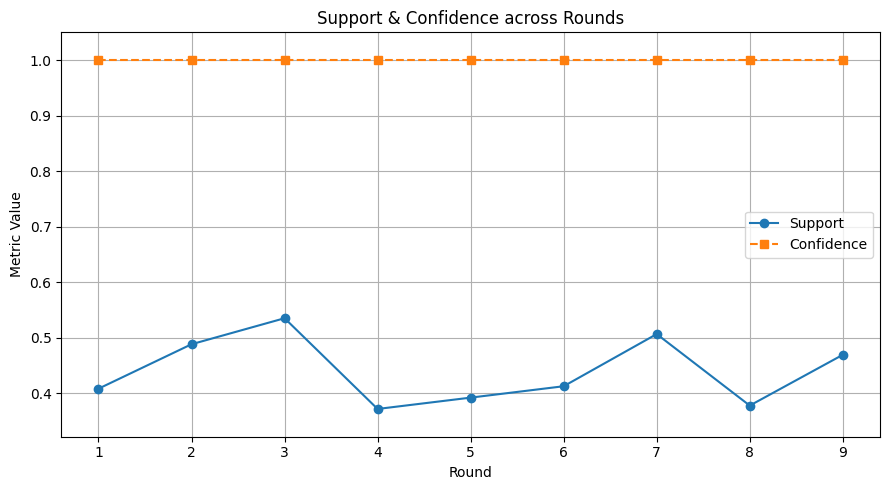


🔍 Rule #2:
"Allow many/few immigrants from poorer countries outside Europe" [bin 1 from 3]
"How close to party" [bin 1 from 3]
  ->
"Feel closer to a particular party than all other parties" [bin 1 from 3]

================= Round #1 =================
Support: 0.3612 - Confidence: 1.0000 - Lift: 1.0248

================= Round #2 =================
Support: 0.4111 - Confidence: 1.0000 - Lift: 1.0137

================= Round #3 =================
Support: 0.4622 - Confidence: 1.0000 - Lift: 1.0067

================= Round #4 =================
Support: 0.3358 - Confidence: 1.0000 - Lift: 1.0080

================= Round #5 =================
Support: 0.3415 - Confidence: 1.0000 - Lift: 1.0053

================= Round #6 =================
Support: 0.3681 - Confidence: 1.0000 - Lift: 1.0054

================= Round #7 =================
Support: 0.4240 - Confidence: 1.0000 - Lift: 1.0051

================= Round #8 =================
Support: 0.3426 - Confidence: 1.0000 - Lift: 1.0006

========

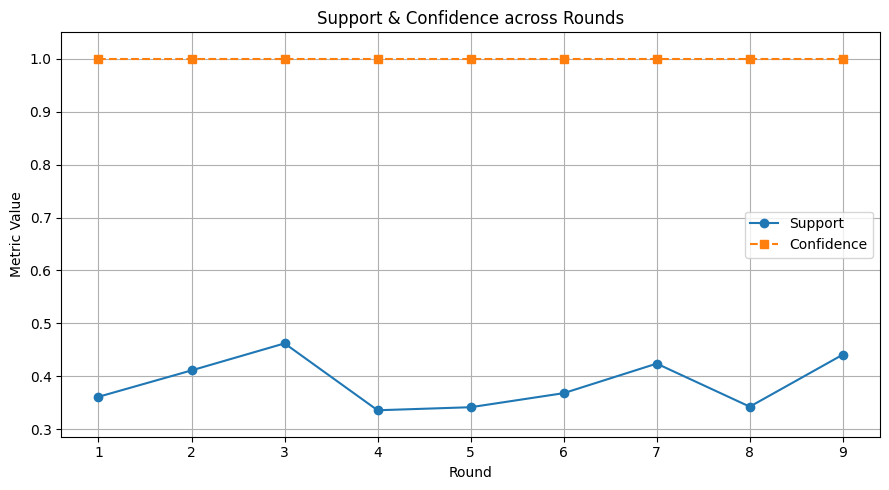


🔍 Rule #3:
"Important to be loyal to friends and devote to people close" [bin 1 from 3]
"How close to party" [bin 1 from 3]
  ->
"Feel closer to a particular party than all other parties" [bin 1 from 3]

================= Round #1 =================
Support: 0.3586 - Confidence: 1.0000 - Lift: 1.0248

================= Round #2 =================
Support: 0.4274 - Confidence: 1.0000 - Lift: 1.0137

================= Round #3 =================
Support: 0.4744 - Confidence: 1.0000 - Lift: 1.0067

================= Round #4 =================
Support: 0.3335 - Confidence: 1.0000 - Lift: 1.0080

================= Round #5 =================
Support: 0.3580 - Confidence: 1.0000 - Lift: 1.0053

================= Round #6 =================
Support: 0.3724 - Confidence: 1.0000 - Lift: 1.0054

================= Round #7 =================
Support: 0.4613 - Confidence: 1.0000 - Lift: 1.0051

================= Round #8 =================
Support: 0.3431 - Confidence: 1.0000 - Lift: 1.0006

===========

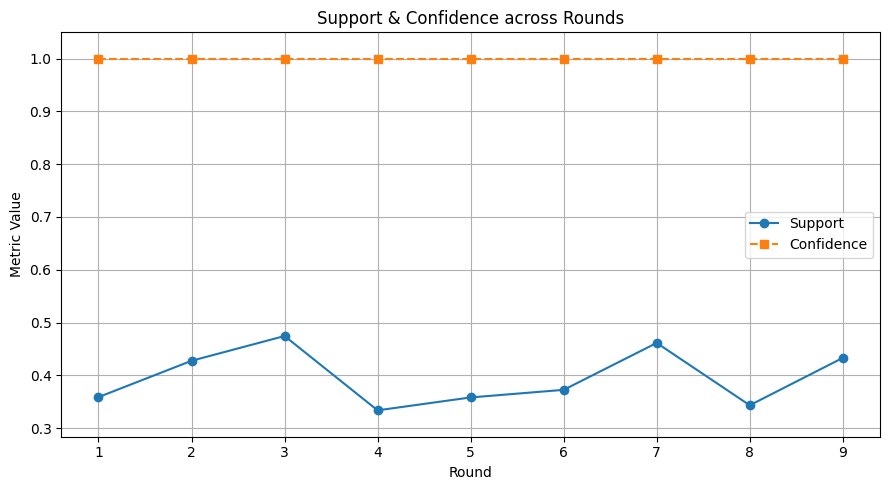

In [23]:
analyze_rule_evolution(round_name=1, num_of_rules=10, min_support=0.35, min_confidence=1, use_mapping=True, plot=True)

In [24]:
analyze_rule_evolution(round_name=8, num_of_rules=10, min_support=0.6, min_confidence=1, use_mapping=True, plot=False)


Analyzing top 10 rules from Round 8 with minimum support 0.6

🔍 Rule #1:
"Important that people are treated equally and have equal opportunities" [bin 1 from 3]
  ->
"Feel closer to a particular party than all other parties" [bin 1 from 3]

================= Round #1 =================
Support: 0.7346 - Confidence: 0.9776 - Lift: 1.0018

================= Round #2 =================
Support: 0.7745 - Confidence: 0.9878 - Lift: 1.0013

================= Round #3 =================
Support: 0.7848 - Confidence: 0.9937 - Lift: 1.0003

================= Round #4 =================
Support: 0.7568 - Confidence: 0.9903 - Lift: 0.9983

================= Round #5 =================
Support: 0.7694 - Confidence: 0.9939 - Lift: 0.9992

================= Round #6 =================
Support: 0.7838 - Confidence: 0.9973 - Lift: 1.0026

================= Round #7 =================
Support: 0.7609 - Confidence: 0.9963 - Lift: 1.0014

================= Round #8 =================
Support: 0.7452 - Confidenc

### Evaluate Randomly Selected Rules Across Rounds

This function selects a given number of random rules and evaluates their performance across multiple rounds.

- **amount** – number of random rules to generate and analyze.
- **use_mapping** – to control whether raw or mapped attribute names are shown.
- **plot** – visualizes **support** and **confidence** of each rule across rounds.

In [25]:
evaluate_random_rules(amount=10, use_mapping=False, plot=False)

"ipeqopt" [bin 2 from 3]
  ->
"ipcrtiv" [bin 1 from 3]

================= Round #1 =================
Support: 0.0916 - Confidence: 0.4508 - Lift: 0.8629

================= Round #2 =================
Support: 0.0776 - Confidence: 0.4095 - Lift: 0.7688

================= Round #3 =================
Support: 0.0734 - Confidence: 0.3837 - Lift: 0.8126

================= Round #4 =================
Support: 0.0818 - Confidence: 0.3770 - Lift: 0.8042

================= Round #5 =================
Support: 0.0751 - Confidence: 0.3689 - Lift: 0.7519

================= Round #6 =================
Support: 0.0706 - Confidence: 0.3697 - Lift: 0.7577

================= Round #7 =================
Support: 0.0865 - Confidence: 0.4146 - Lift: 0.8078

================= Round #8 =================
Support: 0.1065 - Confidence: 0.4530 - Lift: 0.8395

================= Round #9 =================
Support: 0.0979 - Confidence: 0.4314 - Lift: 0.8084
"imsmetn" [bin 2 from 3]
  ->
"imdfetn" [bin 2 from 3]

=======

## 📊 Metrics Used in the Analysis

Below we summarize the key metrics used throughout this notebook for evaluating association rules: **support**, **confidence**, and **lift**.

## 🔹 1. **Support**

### 📌 Formula:

For a rule **A → B**:

$$
\text{support}(A \rightarrow B) = \frac{\text{Number of transactions containing } A \cup B}{\text{Total number of transactions}} = P(A \cup B)
$$

### 🧠 Explanation:

Support indicates **how frequently** the rule **A ∪ B** appears in the dataset. It tells us the **prevalence** of the combined itemset A and B in the whole context.

* In FCA terms: how many objects have **all attributes in A and B**.

### 📈 Value range:

$$
0 \leq \text{support}(A \rightarrow B) \leq 1
$$

* **Close to 1** → Very common combination
* **Close to 0** → Rare pattern

---

## 🔹 2. **Confidence**

### 📌 Formula:

$$
\text{confidence}(A \rightarrow B) = \frac{\text{support}(A \cup B)}{\text{support}(A)} = P(B \mid A)
$$

### 🧠 Explanation:

Confidence measures the **reliability** of the rule. It tells us how often **B is present** when **A is present**.

* In FCA: Out of all objects having attributes in A, how many also have attributes in B.

### 📈 Value range:

$$
0 \leq \text{confidence}(A \rightarrow B) \leq 1
$$

* **1.0** → Perfect confidence (always true)
* **0.0** → Never true

---

## 🔹 3. **Lift**

### 📌 Formula:

$$
\text{lift}(A \rightarrow B) = \frac{\text{confidence}(A \rightarrow B)}{\text{support}(B)} = \frac{P(B \mid A)}{P(B)} = \frac{P(A \cup B)}{P(A) \cdot P(B)}
$$

### 🧠 Explanation:

Lift shows the **degree of dependence** between A and B. It compares the observed co-occurrence of A and B to what would be expected if A and B were independent.

* **Lift = 1** → A and B are **independent**
* **Lift > 1** → Positive association (A and B co-occur more than expected)
* **Lift < 1** → Negative association (A reduces likelihood of B)

### 📈 Value range:

$$
0 \leq \text{lift}(A \rightarrow B) < \infty
$$



## 📌 Summary Table

| Metric         | Formula                                  | Interpretation                      | Range   |
| -------------- | ---------------------------------------- | ----------------------------------- | ------- |
| **Support**    | $P(A \cup B)$                            | Frequency of A and B together       | \[0, 1] |
| **Confidence** | $P(B \mid A) = \frac{P(A \cup B)}{P(A)}$ | Accuracy of predicting B from A     | \[0, 1] |
| **Lift**       | $\frac{P(B \mid A)}{P(B)}$               | Measure of independence/association | (0, ∞)  |